# Imports

In [8]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [9]:
n = 7
label_name = "stat6"
layers = [n**2, 2]

epochs = 5000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [10]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [11]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.79305428266525
Epoch 1, Loss 43.78910022974014
Epoch 2, Loss 43.783326745033264
Epoch 3, Loss 43.778178215026855
Epoch 4, Loss 43.776078164577484
Epoch 5, Loss 43.772484600543976
Epoch 6, Loss 43.764206290245056
Epoch 7, Loss 43.75927269458771
Epoch 8, Loss 43.755463778972626
Epoch 9, Loss 43.758545100688934
Epoch 10, Loss 43.74988889694214
Epoch 11, Loss 43.74266266822815
Epoch 12, Loss 43.74191677570343
Epoch 13, Loss 43.74147880077362
Epoch 14, Loss 43.7338103055954
Epoch 15, Loss 43.73294407129288
Epoch 16, Loss 43.729653120040894
Epoch 17, Loss 43.72631597518921
Epoch 18, Loss 43.72034066915512
Epoch 19, Loss 43.72346740961075
Epoch 20, Loss 43.71487331390381
Epoch 21, Loss 43.71374374628067
Epoch 22, Loss 43.71162074804306
Epoch 23, Loss 43.7078852057457
Epoch 24, Loss 43.70541310310364
Epoch 25, Loss 43.70331782102585
Epoch 26, Loss 43.70269978046417
Epoch 27, Loss 43.698171854019165
Epoch 28, Loss 43.69750100374222
Epoch 29, Loss 43.694944739341736
Epoch 30, Lo

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

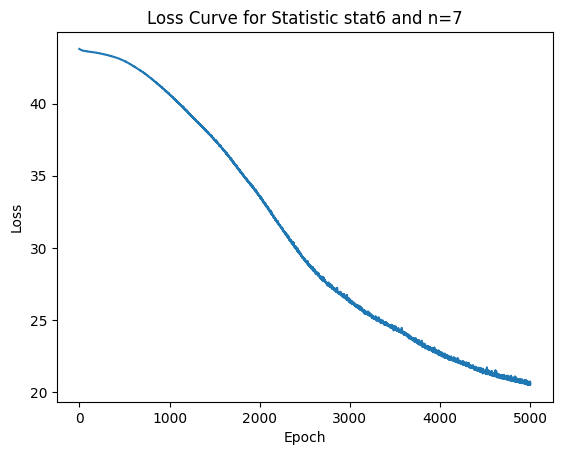

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 77.85714285714286%
Accuracy for class 1 = 79.8015873015873%
Overall accuracy = 78.82936507936508%


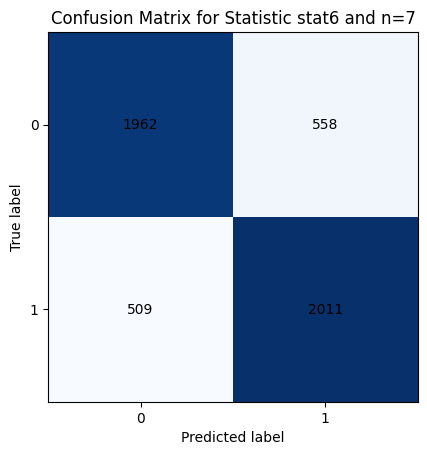

In [13]:
confusion_matrix = evaluate_model(model, full_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

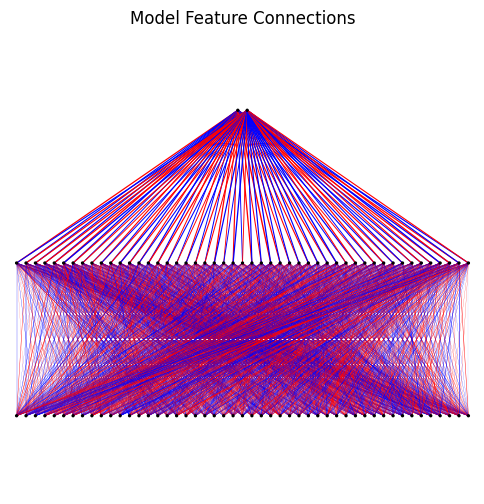

Layer 1


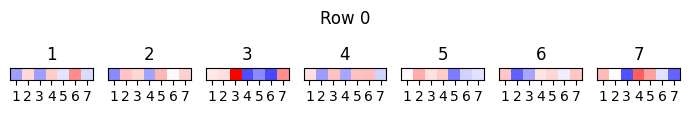

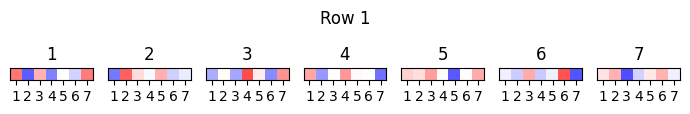

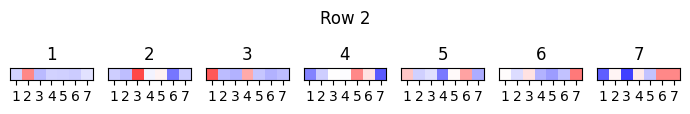

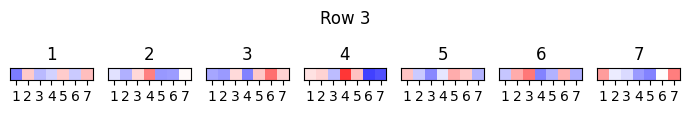

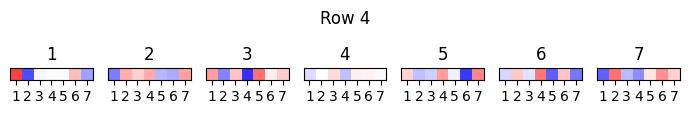

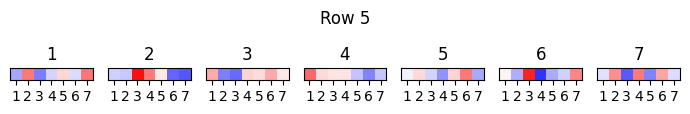

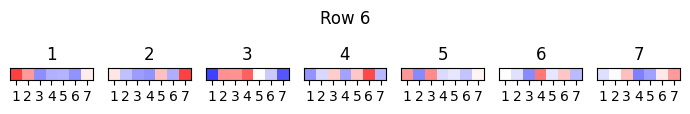

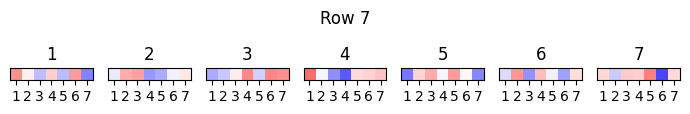

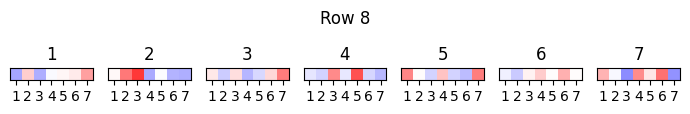

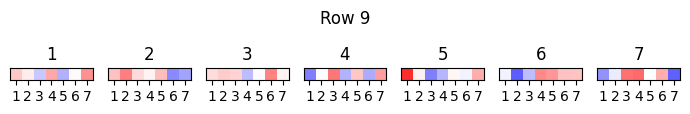

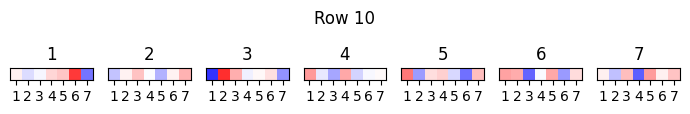

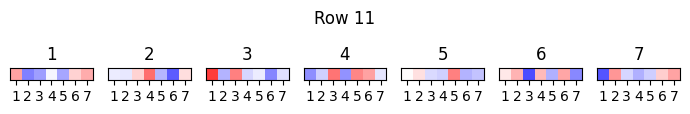

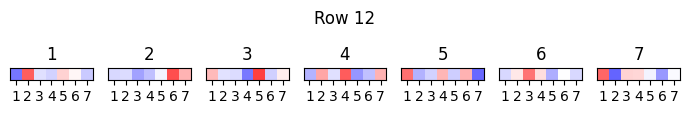

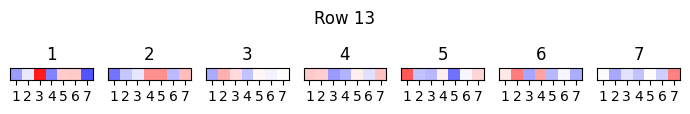

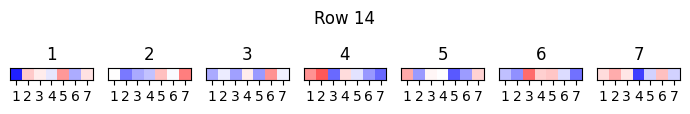

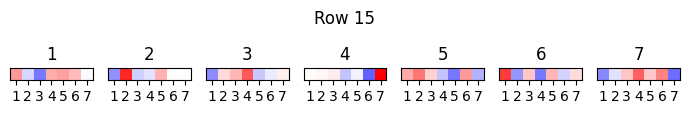

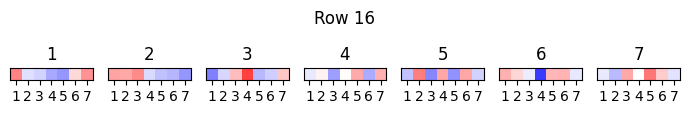

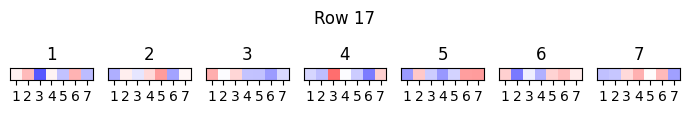

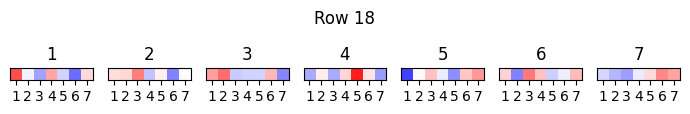

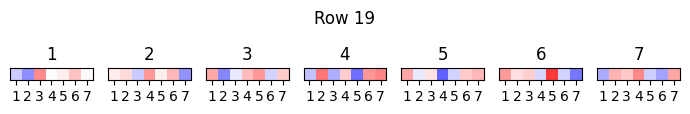

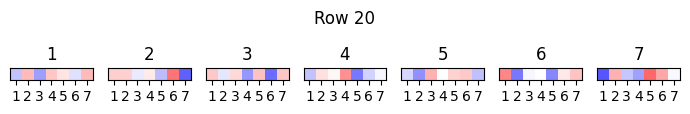

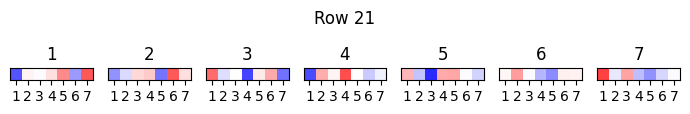

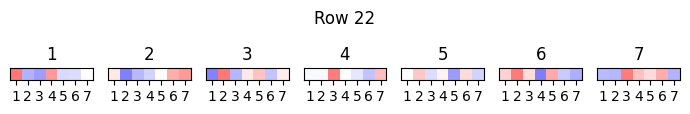

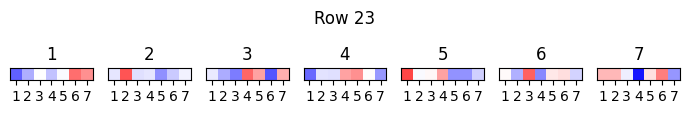

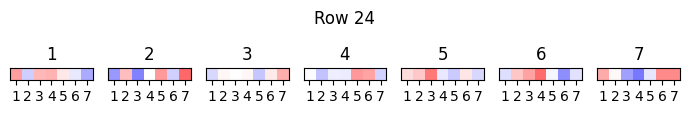

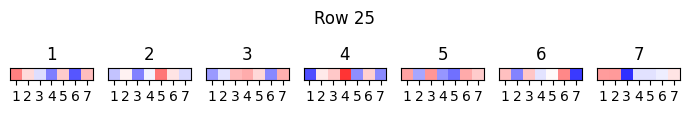

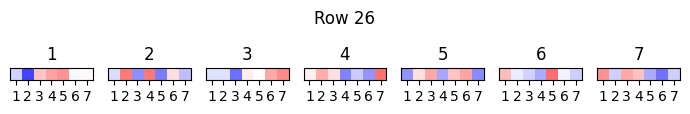

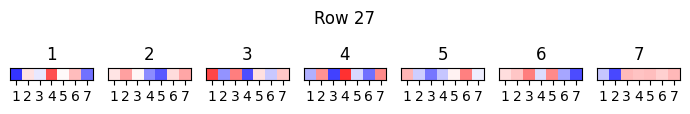

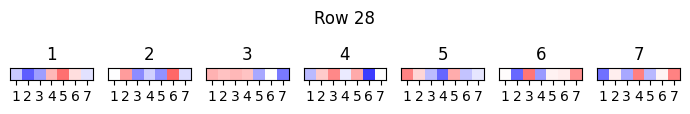

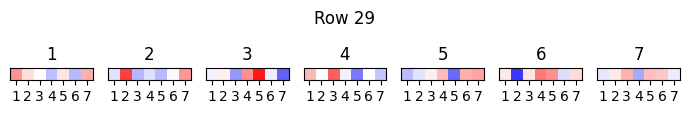

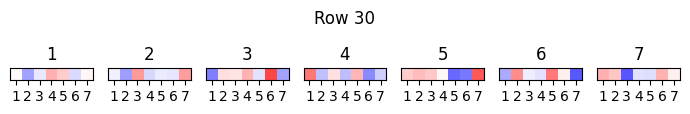

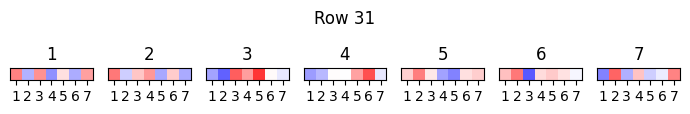

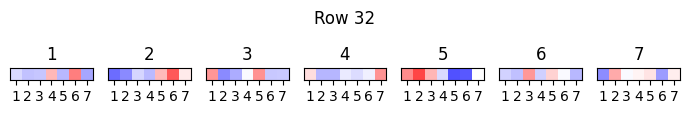

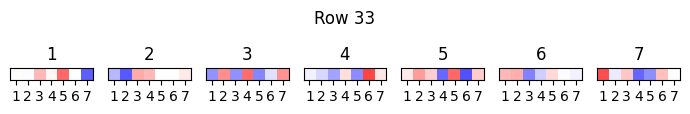

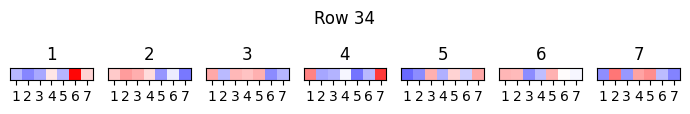

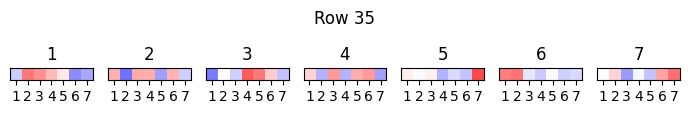

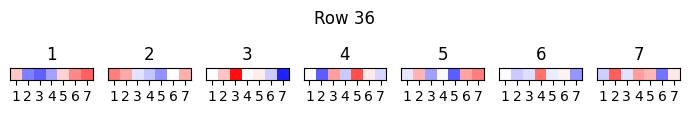

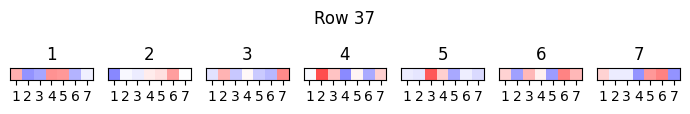

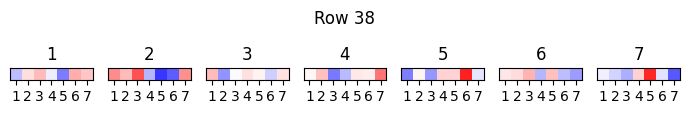

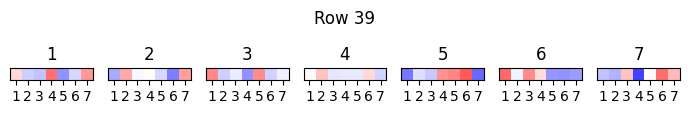

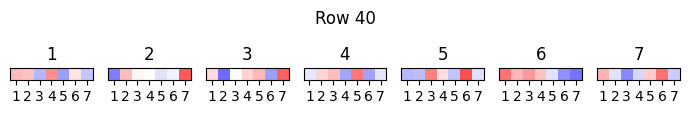

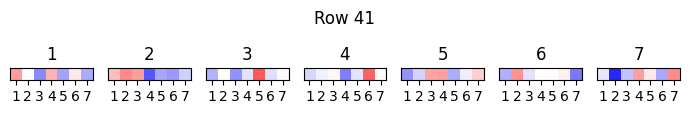

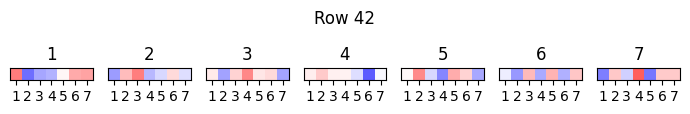

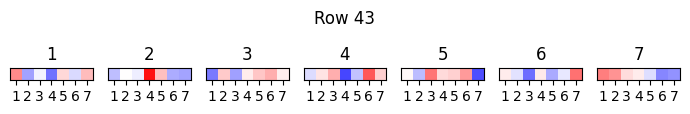

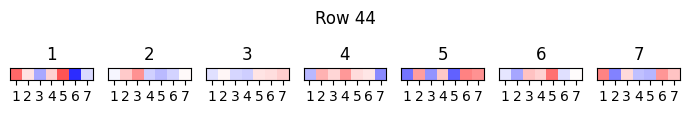

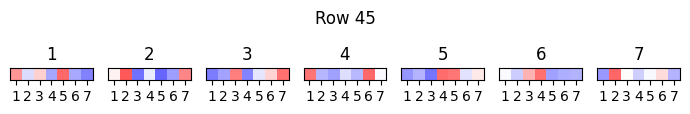

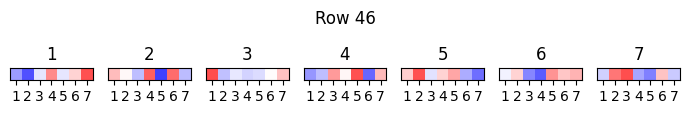

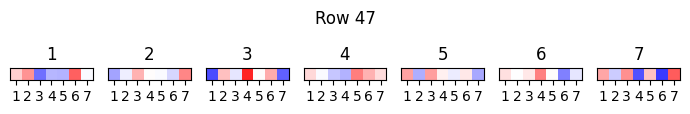

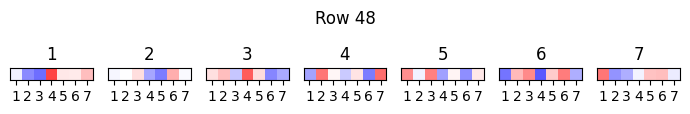

Layer 2


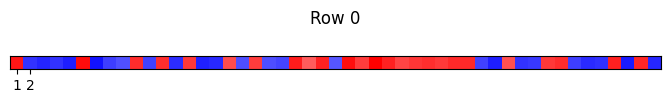

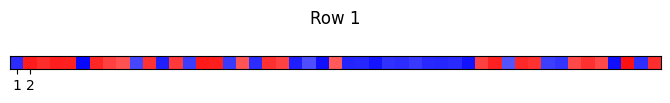

In [14]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)